In [44]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import sqlite3
gen_data=[]
personal_data=[]
bank_data=[]
status_data=[]
a= pd.read_csv('C:\\Users\\Aravind Kumar Damera\\Downloads\\Churn_Modelling.csv')
with open('C:\\Users\\Aravind Kumar Damera\\Downloads\\Churn_Modelling.csv') as f:
    print(f.readline().strip().split(','))
    for i in f.readlines():
        col = i.strip().split(',')
        if col[0] and col[1] and col[2] and col[3] and col[4] and col[5] and col[6] and col[7] and col[8] and col[9] and col[10] and col[11] and col[12] and col[13]:
            gen_data.append((col[0],col[1],col[3],col[7],col[12]))
            personal_data.append((col[0],col[2],col[4],col[5],col[6]))
            bank_data.append((col[0],col[8],col[9],col[10],col[11]))
            status_data.append((col[0],col[13]))

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [6]:
def create_connection(db_file, delete_db=False):
        import os
        if delete_db and os.path.exists(db_file):
            os.remove(db_file)

        conn = None
        try:
            conn = sqlite3.connect(db_file)
            conn.execute("PRAGMA foreign_keys = 1")
        except Error as e:
            print(e)

        return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [7]:
create_table_sql = """Create table if not exists[General_Info] (
    [RowNumber] Integer,[CustomerId] Integer,[CreditScore] Integer,
    [Tenure] Integer,[EstimatedSalary] Real);"""
conn = create_connection('bankchurn.db', False)
create_table(conn, create_table_sql)

def insert_General_Information(conn, values):
    sql = ''' INSERT INTO General_Info(RowNumber,CustomerId,CreditScore,Tenure,EstimatedSalary)
            VALUES(?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn:
    for data in gen_data:
        insert_General_Information(conn, data)
sql_statement = "SELECT * FROM General_Info"
df_GI = pd.read_sql_query(sql_statement, conn)
display(df_GI)


,RowNumber,CustomerId,CreditScore,Tenure,EstimatedSalary
0,1,15634602,619,2,101348.88
1,2,15647311,608,1,112542.58
2,3,15619304,502,8,113931.57
3,4,15701354,699,1,93826.63
4,5,15737888,850,2,79084.10
...,...,...,...,...,...
19995,9996,15606229,771,5,96270.64
19996,9997,15569892,516,10,101699.77
19997,9998,15584532,709,7,42085.58
19998,9999,15682355,772,3,92888.52


In [8]:
create_table_sql = """Create table if not exists[Personal_Information] (
    [RowNumber] Integer,[Surname] Text,[Geography] Text,
    [Gender] Text,[Age] Text);"""
conn = create_connection('bankchurn.db', False)
conn.execute('''DROP TABLE IF EXISTS Personal_Information''')
create_table(conn, create_table_sql)

def insert_Personal_Information(conn, values):
    sql = ''' INSERT INTO Personal_Information(RowNumber,Surname,Geography,Gender,Age)
            VALUES(?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn:
    for data in personal_data:
        insert_Personal_Information(conn, data)
sql_statement = "SELECT * FROM Personal_Information"
df_PI = pd.read_sql_query(sql_statement, conn)
display(df_PI)


,RowNumber,Surname,Geography,Gender,Age
0,1,Hargrave,France,Female,42
1,2,Hill,Spain,Female,41
2,3,Onio,France,Female,42
3,4,Boni,France,Female,39
4,5,Mitchell,Spain,Female,43
...,...,...,...,...,...
9995,9996,Obijiaku,France,Male,39
9996,9997,Johnstone,France,Male,35
9997,9998,Liu,France,Female,36
9998,9999,Sabbatini,Germany,Male,42


In [9]:
create_table_sql = """Create table if not exists[Bank_Info] (
    [RowNumber] Integer,[Balance] Real,[NumOfProducts] Integer,
    [HasCrCard] Integer,[IsActiveMember] Integer);"""
conn = create_connection('bankchurn.db', False)
conn.execute('''DROP TABLE IF EXISTS Bank_Info''')
create_table(conn, create_table_sql)

def insert_Bank_Information(conn, values):
    sql = ''' INSERT INTO Bank_Info(RowNumber,Balance,NumOfProducts,HasCrCard,IsActiveMember)
            VALUES(?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn:
    for data in bank_data:
        insert_Bank_Information(conn, data)
sql_statement = "SELECT * FROM Bank_Info"
df_BI = pd.read_sql_query(sql_statement, conn)
display(df_BI)


,RowNumber,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,1,0.00,1,1,1
1,2,83807.86,1,0,1
2,3,159660.80,3,1,0
3,4,0.00,2,0,0
4,5,125510.82,1,1,1
...,...,...,...,...,...
9995,9996,0.00,2,1,0
9996,9997,57369.61,1,1,1
9997,9998,0.00,1,0,1
9998,9999,75075.31,2,1,0


In [10]:
create_table_sql = """Create table if not exists[Status_Info] (
    [RowNumber] Integer,[Exited] Integer);"""
conn = create_connection('bankchurn.db', False)
conn.execute('''DROP TABLE IF EXISTS Bank_Information''')
create_table(conn, create_table_sql)

def insert_Status_Info(conn, values):
    sql = ''' INSERT INTO Status_Info(RowNumber,Exited)
            VALUES(?,?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn:
    for data in status_data:
        insert_Status_Info(conn, data)
sql_statement = "SELECT * FROM Status_Info"
df_Exited = pd.read_sql_query(sql_statement, conn)
display(df_Exited)


,RowNumber,Exited
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
49995,9996,0
49996,9997,0
49997,9998,1
49998,9999,1


{0: 7963, 1: 2037}

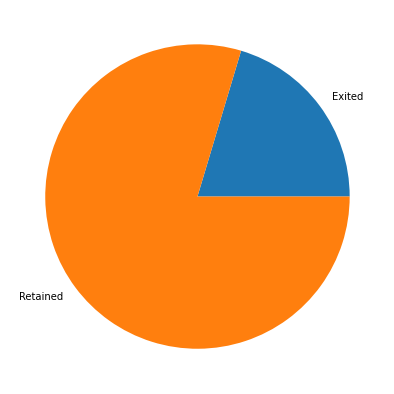

In [12]:
sql_statement='''Select distinct * from Status_Info '''
df = pd.read_sql_query(sql_statement, conn)
exit=dict(df['Exited'].value_counts())
display(exit)
lb = 'Exited', 'Retained'
data=[exit[1],exit[0]]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lb)
plt.show()

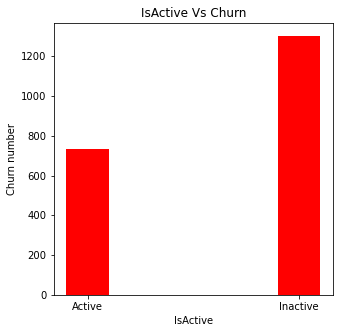

In [13]:
sql_statement='''Select distinct * from Personal_Information p  join Status_Info s join Bank_Info b  on  p.RowNumber=s.RowNumber and s.RowNumber= b.RowNumber where s.Exited=1'''
df = pd.read_sql_query(sql_statement, conn)
activemem_vs_exit=dict(df['IsActiveMember'].value_counts())
activemem_vs_exit["Active"] = activemem_vs_exit.pop(1)
activemem_vs_exit["Inactive"] = activemem_vs_exit.pop(0)
import matplotlib.pyplot as plt
 
active = list(activemem_vs_exit.keys())
count = list(activemem_vs_exit.values())
  
fig = plt.figure(figsize = (5, 5))

plt.bar(active, count, color ='red',
        width = 0.2)

plt.xlabel("IsActive")
plt.ylabel("Churn number")
plt.title("IsActive Vs Churn")
plt.show()

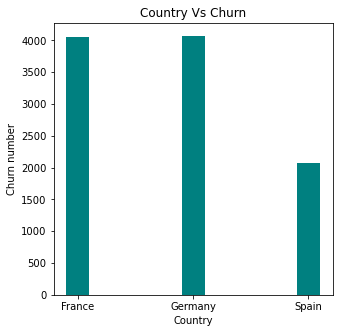

In [14]:
sql_statement='''Select * from Status_Info s left join Personal_Information p where p.RowNumber=s.RowNumber and s.Exited=1'''
df = pd.read_sql_query(sql_statement, conn)
country_vs_exit=dict(df['Geography'].value_counts())
country_vs_exit=dict(sorted(country_vs_exit.items(),key= lambda x:x[0]))

import matplotlib.pyplot as plt
 
country = list(country_vs_exit.keys())
count = list(country_vs_exit.values())
  
fig = plt.figure(figsize = (5, 5))

plt.bar(country, count, color ='teal',
        width = 0.2)
 
plt.xlabel("Country")
plt.ylabel("Churn number")
plt.title("Country Vs Churn")
plt.show()




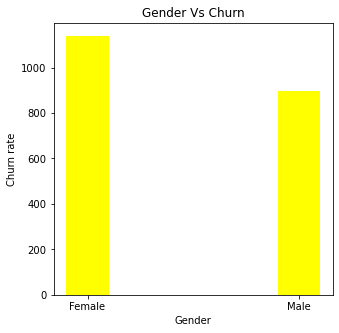

In [15]:
sql_statement='''Select distinct * from Personal_Information p  join Status_Info s on p.RowNumber=s.RowNumber where s.Exited=1'''
df = pd.read_sql_query(sql_statement, conn)
gender_vs_exit=dict(df['Gender'].value_counts())
import matplotlib.pyplot as plt
 
gender = list(gender_vs_exit.keys())
count = list(gender_vs_exit.values())
  
fig = plt.figure(figsize = (5, 5))

plt.bar(gender, count, color ='Yellow',
        width = 0.2)
 
plt.xlabel("Gender")
plt.ylabel("Churn rate")
plt.title("Gender Vs Churn")
plt.show()




In [45]:
a.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

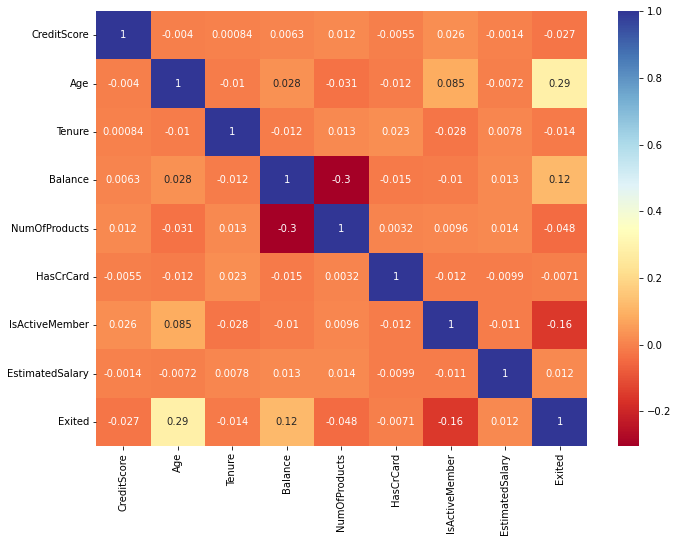

In [46]:
plt.subplots(figsize=(11,8))
sns.heatmap(a.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [47]:
encoder = LabelEncoder()
a["Geography"] = encoder.fit_transform(a["Geography"])
a["Gender"] = encoder.fit_transform(a["Gender"])
X = a.drop("Exited", axis=1)
y = a["Exited"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.789

In [50]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.864